In [82]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd #numerical analysis library
import numpy as np #data analysis library
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #visualization library
from sklearn.linear_model import LinearRegression #linear regression modelling 
from sklearn.metrics import r2_score, mean_squared_error #accuracy check metric library
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler 

In [84]:
data = pd.read_csv("train.csv")

In [85]:
# Check the head of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Inspect the various aspects of the data dataframe

In [86]:
data.shape
#importing dataset through pandas library

(1460, 81)

In [87]:
n=data.isnull().sum() #checking the no. of null enteries in the dataset as part of data cleaning process 
n

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [88]:
data1=data.drop(data.columns[[6,57,72,73,74,32,33,35,59,60,63]],axis=1)#dropping all the columns which has aroudn 50% or more missing values and based on domain knowledge, irrelavant on basis on problem & data dictionary 
n=data1.isnull().sum() #checking the no. of null enteries in the dataset as part of data cleaning process 
n

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 70, dtype: int64

In [89]:
for i in data1.columns:
    print(i,data1[i].nunique())
#to get the info for uniques values in the individual drivers shortlisted so as to segregate into categorical & continous variables

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
GarageType 6
GarageCars 5
GarageArea 441
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SaleType 9
SaleCondition 6
SalePrice 663


In [90]:
LotFrontage=data1['LotFrontage'].mode()[0]#calculation the mode
BsmtQual=data1['BsmtQual'].mode()[0]#calculation the mode
BsmtCond=data1['BsmtCond'].mode()[0]#calculation the mode
Electrical=data1['Electrical'].mode()[0]#calculation the mode
GarageType=data1['GarageType'].mode()[0]#calculation the mode
GarageCond=data1['GarageCond'].mode()[0]#calculation the mode
data1['LotFrontage']=data1['LotFrontage'].replace(np.nan,LotFrontage)#replacing the NaN values with mode as it is a categorical driver
data1['BsmtQual']=data1['BsmtQual'].replace(np.nan,BsmtQual)#replacing the NaN values with mode as it is a categorical driver
data1['BsmtCond']=data1['Electrical'].replace(np.nan,Electrical)#replacing the NaN values with mode as it is a categorical driver
data1['Electrical']=data1['Electrical'].replace(np.nan,Electrical)#replacing the NaN values with mode as it is a categorical driver
data1['GarageType']=data1['GarageType'].replace(np.nan,GarageType)#replacing the NaN values with mode as it is a categorical driver
data1['GarageCond']=data1['GarageCond'].replace(np.nan,GarageCond)#replacing the NaN values with mode as it is a categorical driver

In [91]:
n=data1.isnull().sum() #checking the no. of null enteries in the dataset as part of data cleaning process 

In [92]:
data2=data1.drop(data1.columns[[0,1,10,11,13,16,17,18,9,7,65,66,64,58,59,60,61,62,54,55,56,57,51,59,38,36,29,31,33,34,26,24,23,22,21]],axis=1)#dropping all the columns which has aroudn 50% or more missing values and based on domain knowledge, irrelavant on basis on problem & data dictionary

In [93]:
n=data2.isnull().sum()

In [94]:
MasVnrArea=data2['MasVnrArea'].mode()[0]#calculation the mode of MasVnrArea
data2['MasVnrArea']=data2['MasVnrArea'].replace(np.nan,MasVnrArea)#replacing the NaN values of MasVnrArea driver with mode 

In [95]:
data2.describe()
#calculating some statistical data like percentile, mean and std of the numerical values of the data

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,1984.865753,103.117123,46.549315,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,2.758904,180921.195890
std,22.356355,9981.264932,20.645407,180.731373,161.319273,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,40.177307,79442.502883
min,21.000000,1300.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1967.000000,0.000000,0.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,1994.000000,0.000000,0.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,163000.000000
75%,79.000000,11601.500000,2004.000000,164.250000,0.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,1600.000000,1474.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,738.000000,755000.000000


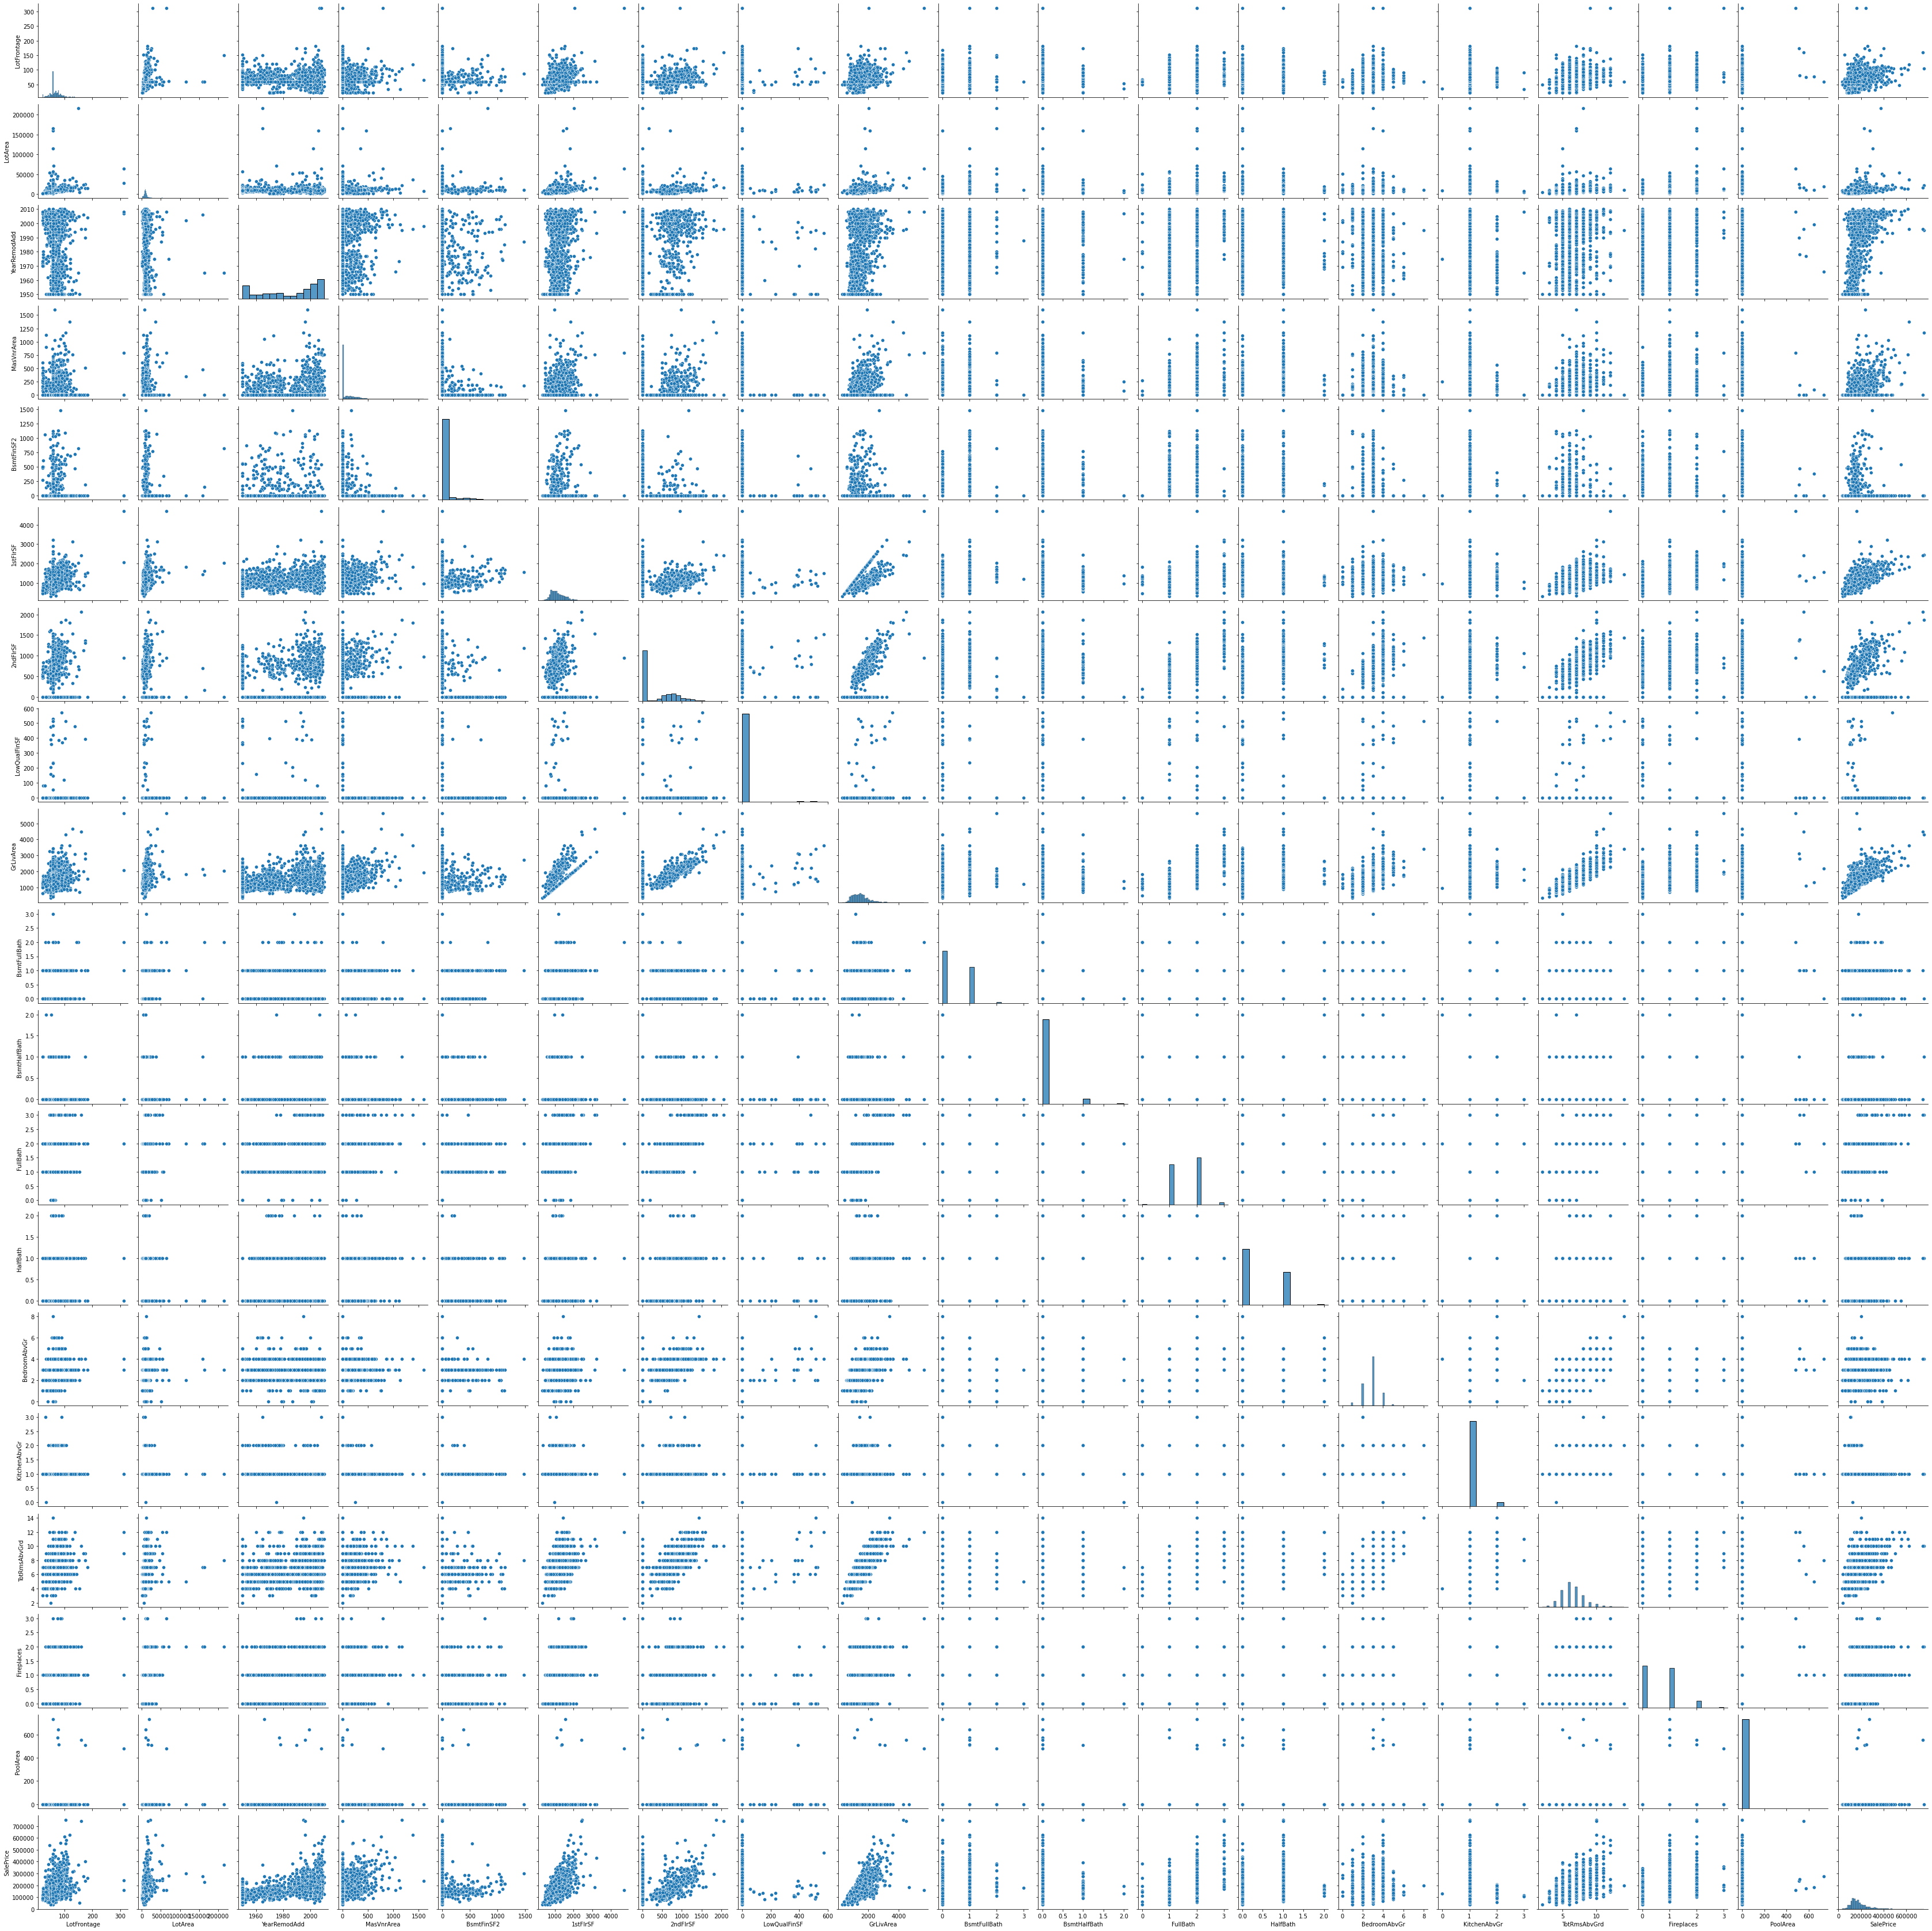

In [96]:
sns.pairplot(data2)#pairplot command
plt.show()
#ploting multiple scatterplot for continous variable to understand there relevance relative to target variable

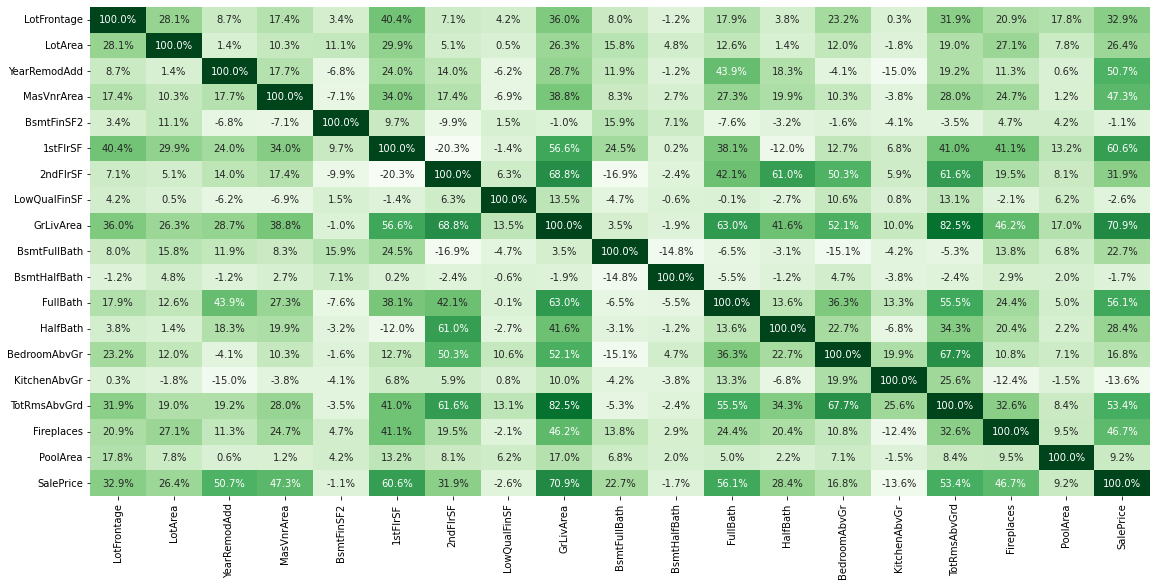

In [97]:
plt.figure(figsize = (19,9)) #fixing the figure size of the plot
sns.heatmap(data2.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False)#running command for heatmap for correlation of continous variable
plt.show()
#correlation matrix formed through heatmap to understand the correlation of continous variables & there relevance

In [98]:
from sklearn.model_selection import train_test_split #importing relevant libraries for model building

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [99]:
df_train.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PoolArea,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,67.984329,10485.737512,1984.938296,104.489716,50.087169,1168.353575,342.672870,5.999021,1517.025465,0.439765,0.059745,1.566112,0.376102,2.855044,1.053869,6.501469,0.597453,2.149853,180441.339863
std,22.379125,10309.181603,20.630577,187.341089,170.847470,398.008990,435.299706,48.207914,532.017383,0.525381,0.241230,0.551991,0.500565,0.820417,0.230169,1.605520,0.645917,34.524133,79092.269270
min,21.000000,1477.000000,1950.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,34900.000000
25%,60.000000,7446.000000,1967.000000,0.000000,0.000000,875.000000,0.000000,0.000000,1134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,129500.000000
50%,60.000000,9500.000000,1994.000000,0.000000,0.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,160000.000000
75%,78.000000,11512.000000,2004.000000,158.000000,0.000000,1422.000000,727.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,1600.000000,1474.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,648.000000,755000.000000


In [100]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train

In [101]:
import statsmodels.api as sm

# Add a constant or intercept & selecting GrLivArea as first feature or driver it has the highest correlation with dependent variable
X_train_lm = sm.add_constant(X_train[['GrLivArea']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [102]:
# Checking the parameters obtained
lr.params

const        23345.502827
GrLivArea      103.555175
dtype: float64

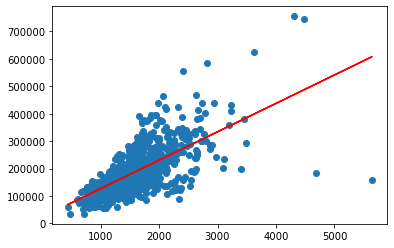

In [103]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 23345.502827 +103.555175*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [104]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     960.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.28e-149
Time:                        17:33:10   Log-Likelihood:                -12624.
No. Observations:                1021   AIC:                         2.525e+04
Df Residuals:                    1019   BIC:                         2.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.335e+04   5371.489      4.346      0.0

In [105]:
# Assigning additional feature variables to X
X_train_lm = X_train[['GrLivArea','1stFlrSF','FullBath','TotRmsAbvGrd','YearRemodAdd']]

In [106]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          -2.176692e+06
GrLivArea       7.838465e+01
1stFlrSF        5.013729e+01
FullBath        9.442852e+03
TotRmsAbvGrd   -6.110396e+03
YearRemodAdd    1.110655e+03
dtype: float64

In [107]:
# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     365.7
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.06e-224
Time:                        17:33:11   Log-Likelihood:                -12438.
No. Observations:                1021   AIC:                         2.489e+04
Df Residuals:                    1015   BIC:                         2.492e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.177e+06   1.58e+05    -13.739   

Looking at the p-values in the above result we have it looks like the variables are really significant
And also our adjusted R2 has increase from 48% to 64%

In [108]:
# Assigning additional feature variables to X on the basis of the REF & above correlation matrix 
X_train_lm_1 = X_train[['1stFlrSF','FullBath','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFullBath','BedroomAbvGr','2ndFlrSF','KitchenAbvGr']]


In [109]:
# Build a linear model with new features

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)
lr1 = sm.OLS(y_train, X_train_lm_1).fit()
lr1.params

const          -1.527140e+06
1stFlrSF        9.569593e+01
FullBath        1.849918e+04
YearRemodAdd    8.068047e+02
MasVnrArea      5.911938e+01
Fireplaces      1.173649e+04
BsmtFullBath    1.708785e+04
BedroomAbvGr   -8.275272e+03
2ndFlrSF        6.288265e+01
KitchenAbvGr   -5.055740e+04
dtype: float64

In [110]:
# Print the summary of the model

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     291.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.27e-273
Time:                        17:33:11   Log-Likelihood:                -12310.
No. Observations:                1021   AIC:                         2.464e+04
Df Residuals:                    1011   BIC:                         2.469e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.527e+06   1.51e+05    -10.124   

Looking at the p-values in the above result we have it looks like of the variables are really significant
And also our adjusted R2 has increase from 64% to 72%

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing relevant libraries to look for multicollinearity among feature in model lr1
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#As we can see there is no feature in model lr1 that are high corelation among each other by considering VIF<5

,Features,VIF
0,const,13228.19
1,1stFlrSF,2.10
8,2ndFlrSF,2.08
2,FullBath,1.98
7,BedroomAbvGr,1.57
5,Fireplaces,1.44
3,YearRemodAdd,1.42
4,MasVnrArea,1.23
9,KitchenAbvGr,1.20
6,BsmtFullBath,1.14


#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [112]:
y_train_pre = lr1.predict(X_train_lm_1)

In [113]:
r2_score(y_train, y_train_pre)

0.7217076714352109

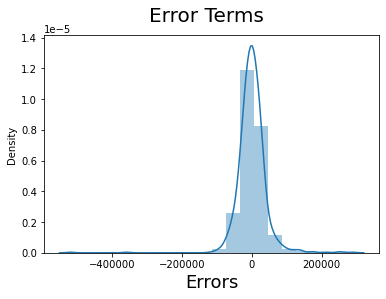

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pre), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

As we can see in the above figure our model residual is perfectly aligned at mean=0 which show its an acceptable model

In [115]:
from sklearn.linear_model import Ridge, Lasso
reg = LinearRegression() 

Ridge Regularization Techniquie

In [116]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

lambdas = [0, 0.001, 0.01, 0.1, 1] # Higher the value of lambda,more the regularization 
for i in lambdas: # for each lambda we get different model coefficients
    degree = 7 # Degree for polynomial regression
    # Creating degree  7 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features   
    X_poly = ridgecoef.fit_transform(X_train_lm_1)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y_train) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X_train_lm_1))
    print("r2 score = " + str(r2_score(y_train, y_pred))) 
    print(list(zip(ridgereg.coef_,X_train_lm_1))) # model coefficients 
                                               

r2 score = 0.9136093871569811
[(0.0, 'const'), (0.0, '1stFlrSF'), (-1.206690757480459e-30, 'FullBath'), (-2.7993007825947975e-33, 'YearRemodAdd'), (-2.9066841513173034e-31, 'MasVnrArea'), (-6.796903836586691e-30, 'Fireplaces'), (-4.974241341471584e-33, 'BsmtFullBath'), (-2.7474995082098967e-33, 'BedroomAbvGr'), (2.6417485981234054e-32, '2ndFlrSF'), (4.88474061899837e-31, 'KitchenAbvGr')]
r2 score = 0.9136093871569811
[(0.0, 'const'), (0.0, '1stFlrSF'), (-1.206690757480459e-30, 'FullBath'), (-2.7993007825947975e-33, 'YearRemodAdd'), (-2.9066841513173034e-31, 'MasVnrArea'), (-6.796903836586691e-30, 'Fireplaces'), (-4.974241341471584e-33, 'BsmtFullBath'), (-2.7474995082098967e-33, 'BedroomAbvGr'), (2.6417485981234054e-32, '2ndFlrSF'), (4.88474061899837e-31, 'KitchenAbvGr')]
r2 score = 0.9136093871569811
[(0.0, 'const'), (0.0, '1stFlrSF'), (-1.206690757480459e-30, 'FullBath'), (-2.7993007825947975e-33, 'YearRemodAdd'), (-2.9066841513173034e-31, 'MasVnrArea'), (-6.796903836586691e-30, 'Fire

Lasso Regularization Techniquie

In [117]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.001,0.01,1,10]
for i in lambdas:
    degree = 7
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features 
    X_poly = lassocoef.fit_transform(X_train_lm_1)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y_train)
   
    # Compute R^2 
    y_pred = lassoreg.predict(lassocoef.fit_transform(X_train_lm_1))
    print("r2 score = " + str(r2_score(y_train, y_pred)))
    print(list(zip(lassoreg.coef_,X_train_lm_1)))

r2 score = 0.936552310170379
[(0.0, 'const'), (0.0, '1stFlrSF'), (-51.400402713865326, 'FullBath'), (-2850.114690408, 'YearRemodAdd'), (377.0355772259466, 'MasVnrArea'), (77.63375140683318, 'Fireplaces'), (45144.06558929593, 'BsmtFullBath'), (21653.48526781945, 'BedroomAbvGr'), (16564.840204011503, '2ndFlrSF'), (11.08838683765572, 'KitchenAbvGr')]
r2 score = 0.9365522924169408
[(0.0, 'const'), (0.0, '1stFlrSF'), (-51.42973550345396, 'FullBath'), (-2889.884036876589, 'YearRemodAdd'), (377.4185982572052, 'MasVnrArea'), (77.67251822593693, 'Fireplaces'), (45119.856133945024, 'BsmtFullBath'), (21618.945014264693, 'BedroomAbvGr'), (16564.618189682682, '2ndFlrSF'), (11.094958518224802, 'KitchenAbvGr')]
r2 score = 0.9365422417020187
[(0.0, 'const'), (0.0, '1stFlrSF'), (-54.460985043093636, 'FullBath'), (-6297.314490444918, 'YearRemodAdd'), (408.9140295172607, 'MasVnrArea'), (81.44224124668742, 'Fireplaces'), (42519.27765557805, 'BsmtFullBath'), (18250.536602186596, 'BedroomAbvGr'), (16362.976

In [118]:
# Ridge Regression

ridgecoef = PolynomialFeatures(7, include_bias = True) 
# Transforming input features to polynomial features 
X_poly = ridgecoef.fit_transform(X_train_lm_1)
ridgereg = Ridge(alpha = 0.001) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_poly, y_train) # fit the model on the polynomial features
print(ridgereg.coef_)    
y_pred = ridgereg.predict(ridgecoef.fit_transform(X_train_lm_1))
print("r2 score = " + str(r2_score(y_train, y_pred)))

# Lasso Regression
lassocoef = PolynomialFeatures(7) 
# Transforming input features to polynomial features 
X_poly = lassocoef.fit_transform(X_train_lm_1)
lassoreg = Lasso(alpha = 0.01)  
lassoreg.fit(X_poly, y_train)
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X_train_lm_1))
print("r2 score = " + str(r2_score(y_train, y_pred)))

[ 0.00000000e+00  0.00000000e+00 -1.20669076e-30 ...  7.68504190e-25
  2.46803982e-27  7.86796028e-30]
r2 score = 0.9136093871569811
[ 0.00000000e+00  0.00000000e+00 -5.14297355e+01 ... -2.10736110e-04
 -3.59619323e-02  1.73257759e+01]
r2 score = 0.9365522924169408


As we can see for Ridge with degree=7 and irrespective of alpha value our model improved from 72% to 91% and in case of Lasso regression with degree=7 and alpha=0.01 model improved from 72% to 93%. So we will choose Lasso regression model over Ridge regression as we got better accuracy and coeffcients in Lasso